<figure>
  <IMG SRC="https://raw.githubusercontent.com/mbakker7/exploratory_computing_with_python/master/tudelft_logo.png" WIDTH=250 ALIGN="right">
</figure>

Welcome to the first Training Session (TS) of Dredging for Sustainable Infrastructure (CIEM3302). This notebook consist of various assignments to familiarize yourself with the dredging activities, the used equiment, and their attentionpoints. These insights will be used in other Training Sessions for determining the (optimal) workflow when various activities have to be performed. The content of all training sessions is reflected in the final assignment through a case study.

## 0) Initializing Notebook

In [88]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

pd.options.display.float_format = '{:,}'.format# show , for thousands
pd.set_option('display.max_columns', 1000)# show all columns

from pathlib import Path

# change the width of the cells on screen 
from IPython.display import display, HTML
display(HTML("<style>.container { width:99% !important; }</style>"))

#### Run the cell below to (re) set the data parameters within the notebook, which consist of hourly data of the significant wave height ($H_s$) and water current ($u$).

,Hs [m]
time,
2012-01-01 00:00:00,1.492622729
2012-01-01 01:00:00,1.564041114
2012-01-01 02:00:00,1.609562006
2012-01-01 03:00:00,1.636151964
2012-01-01 04:00:00,1.638944871


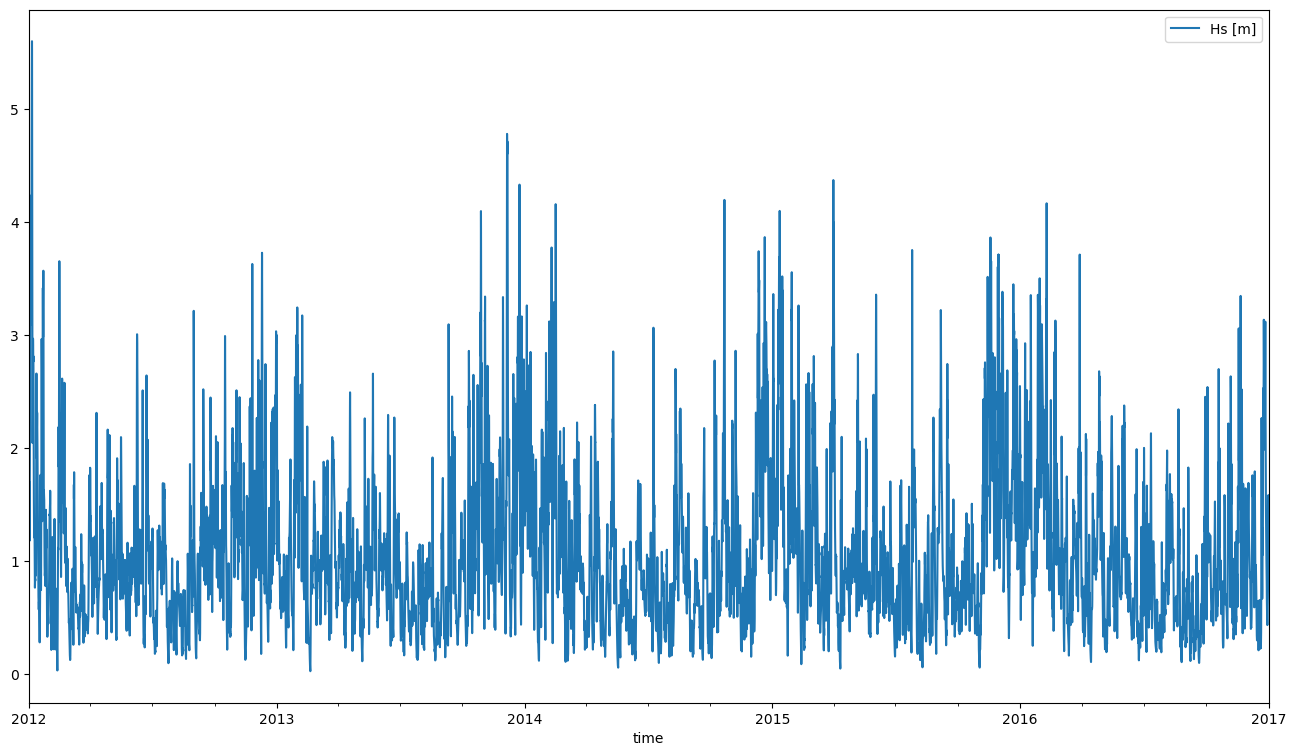

In [89]:
path = Path.cwd()
eurpfm = pd.read_csv(Path.joinpath(path, "Waves_Safe_Haven.csv"), delimiter = ',')
eurpfm['time'] = pd.to_datetime(eurpfm['time'])
eurpfm.set_index(['time'], inplace = True)

display(eurpfm.head(5))
eurpfm.plot(figsize=(16,9),subplots=True);

In [90]:
mean_overal = eurpfm.mean()
print('Mean')
print(mean_overal, "\n", )

print('Standard deviation')
std_overal = eurpfm.std()
print(std_overal)

Mean
Hs [m]   1.061542415649114
dtype: float64 

Standard deviation
Hs [m]   0.6874802644209435
dtype: float64


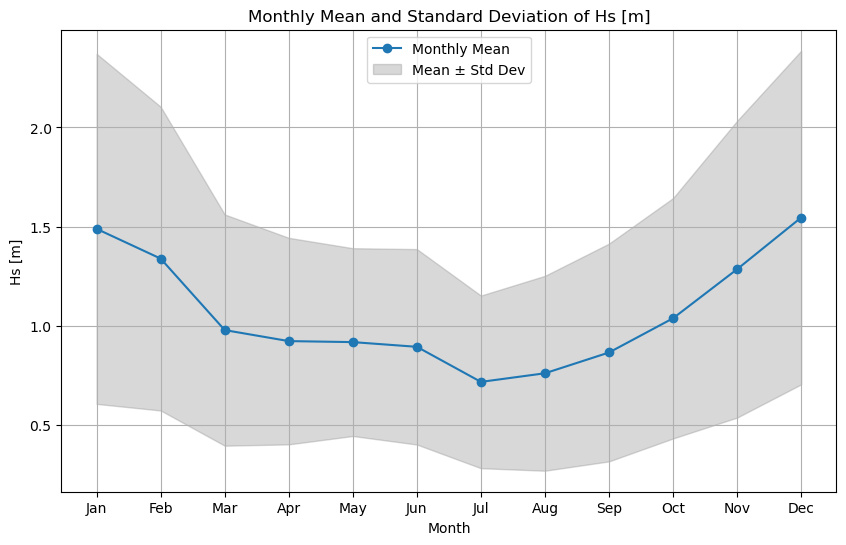

In [91]:

# Group by month (1-12) and calculate mean and std dev for each calendar month across all years
monthly_mean = eurpfm.groupby(eurpfm.index.month).mean()
monthly_std = eurpfm.groupby(eurpfm.index.month).std()

plt.figure(figsize=(10,6))
plt.plot(monthly_mean.index-1, monthly_mean['Hs [m]'], marker='o', label='Monthly Mean')
plt.fill_between(monthly_mean.index-1,
                 monthly_mean['Hs [m]'] - monthly_std['Hs [m]'],
                 monthly_mean['Hs [m]'] + monthly_std['Hs [m]'],
                 color='gray', alpha=0.3, label='Mean ± Std Dev')
plt.xticks(ticks=range(12), labels=months)
plt.xlabel('Month')
plt.ylabel('Hs [m]')
plt.title('Monthly Mean and Standard Deviation of Hs [m]')
plt.legend()
plt.grid(True)
plt.show()

#### Advice for calculations

Many formula's will be used in the questions below. Changing the variable will give insight in the importance and effect. An examplary code for plotting the graph is depicted below. Feel free to use it or use own methods. Good luck!

## 1) Operations

The environmental conditions can limit the operational hours, so can waves and currents, limit coastal activities. The following example focusses on a situation where calm weather causes a decrease in the expected wave heights, which is favorable for dredging acitvities. The significant wave height (Hs) and the currents (u) are stored a in Panda DataFrame. The top 4 rows are displayed below and the time series are plotted aswell.

### 1.1) workability

To be able to perform the operation, the significant wave height (Hs) should be maximal 1.5 m and the threshold for the current ($u$) is 0.5 m/s. <br>
Calculate the workability percentage, which is the percentage of time that is suitable to work, which should be 41% in this case. <br>
Hint: conditions can be filtered with similar code:

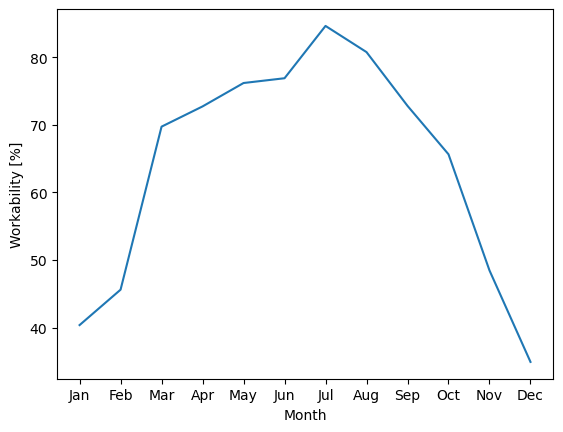

In [92]:

draught= 4.5  #CHANGE WITH BOATS
Hs_thres = 0.25 *draught  #CHANGE WITH BOAT DRAUGHT
work_ability = []

for month in range(1,12+1,1):
    data_month = eurpfm[eurpfm.index.month == month].copy()
    n_all = len(data_month)
    
    data_month = data_month[data_month['Hs [m]'] <= Hs_thres]
    n_workable = len(data_month)
    
    work_ability.append(n_workable/n_all*100)

months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.plot(work_ability);
plt.xticks(np.linspace(0,11,12), months);
plt.xlabel('Month')
plt.ylabel('Workability [%]');

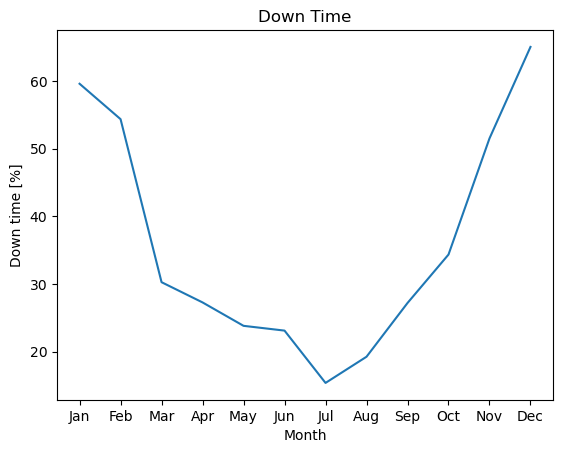

In [93]:
down_time = 100 - np.array(work_ability)

plt.plot(down_time)
plt.title('Down Time')
plt.xticks(np.linspace(0,11,12), months);
plt.xlabel('Month')
plt.ylabel('Down time [%]');

### 1.2) Persistency

How many suitable time windows are available in which at least 6 consecutive hours have a significant wave height($H_s$), you can ignore the restrictions induced by currents ($u$). Hint: There are various approaches, one recommended is to loop over the data and check if the upcoming range/period full fill the requirements. For this, a start is made in the cell below.

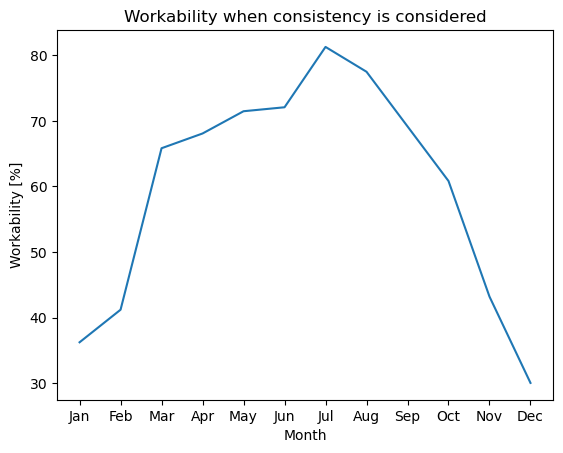

In [94]:
month_assessed = np.zeros(12)# an array that counts how many times each month is reviewed.
month_succes = np.zeros(12)# an array that will count the number of time 6 consequetive hours are occuring


for i in range(len(eurpfm)):
    period = eurpfm.iloc[i:i+6]
    
    month = period.index[0].month
    month_assessed[month-1] += 1# to zero-based

    Hs_serie = period['Hs [m]'].values.tolist()
 
    if np.max(Hs_serie) <= Hs_thres:    
        month_succes[month-1] += 1  # to zero-based
        #print(i, 'succes, Hs', np.max(Hs_serie))
    #else:
    #    print(i, 'not succes, Hs', np.max(Hs_serie), 'Wl min', np.min(WL_serie))

workability = month_succes/month_assessed*100

plt.plot(workability)
plt.title('Workability when consistency is considered')
plt.xticks(np.linspace(0,11,12), months);
plt.xlabel('Month')
plt.ylabel('Workability [%]');

### 1.3) Downtime

The dredging operation can be done in 6 hours. Sailing to and from the site will take 12 hours, for which the significant wave height should be at most 2.0 m. In which time frame(s) can these actions be performed, both independently and in an consecutive order? <br> 

#### 1.3.1) Asses individually:

First, plot on a graph when it is possible to sail and when dredging is possible.
Hint: To build forward on the previous question, and start assesing the activities individually, you could start with:

In [96]:
# plt.figure(figsize=(15, 4))
# plt.plot(DF_conditions.hour, DF_conditions.Hs, label='Hs', color='gray', alpha=0.5)
# plt.scatter(sailing_hours.hour, [2]*len(sailing_hours), label='Sailing possible (Hs < 2.0 m)', color='green', alpha=0.6)
# plt.scatter(operation_hours.hour, [1.5]*len(operation_hours), label='Operation possible (Hs < 1.5 m)', color='blue', alpha=0.6)
# plt.axhline(y=2.0, color='green', linestyle='--', alpha=0.5)
# plt.axhline(y=1.5, color='blue', linestyle='--', alpha=0.5)
# plt.xlabel('Time [hr]')
# plt.ylabel('Hs [m]')
# plt.legend()
# plt.title('Periods suitable for Sailing and Operation')
# plt.show()


#### 1.3.2) Asses in consequtive order:

To check if all the activities can be done, the following code can be used as starting point.

A shortcut for checking if it is possible to start at one specific time can be achieved by changing the loop to:

#### 1.3.3) Follow-up questions:

1a) What would happen if the operational time is 10 hours, rather than 6 hours? <br> 

1b) Wat possible strategies are there to improve the flexibility of the sailing and operational activities so that it can be performed in this 100 hourly time window even if the wave conditions are slightly different then expected? <br>


1c) What other factors can reduce the workability, and why?

## 2) Operations and work method

The following questions focusses on ensuring the accessibility of Safe Haven, where at the (sea side) entrance the navigation channel depth has to be increased from -8.5 to -15.5 meters CD (Chart Datum) over a length of 1 km. The widht of the channel ($B_{bed}$) has to be 50 m. The soil characteristics in this trench are relatively constant within this part to assume the given cross-section is valid for the whole trench. The mean water level is at 0 CD.

The properties of the soil layers are as follows:


##### <center> Table 1: Soil parameters <br>
<table>
  <thead>
    <tr>
      <th>Soil type</th>
      <th>Top elevation layer <br> (CD) [m]</th>
      <th>Bottom elevation layer <br> (CD) [m]</th>
      <th>Internal angle of friction <br> ($\phi$) [&deg;]</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>soft clay</td>
      <td>-8.5</td>
      <td>-11.5</td>
      <td>15</td>
    </tr>
    <tr>
      <td>sand</td>
      <td>-11.5</td>
      <td>-13.5</td>
      <td>35</td>
    </tr>
    <tr>
       <td>cemented sand</td>
      <td>-13.5</td>
      <td>-18</td>
      <td>35</td>
    </tr>
  </tbody>
</table>

<img src="content/1_cross-section.png" width=600 height=60 />
<center> Figure 1: Soil in cross-section channel, which is not on scale.
<center> $z_1$ = -8.5 m CD, $z_2$ = -11.5 m CD, $z_3$ = -13.5 m CD, $z_4$ = -15.5 m CD <br>

### 2.1) Overview of operations

As a first step, it is important to get an overview of the material that has to be dredged (the source) and where this has to be brought (the sink).

### 2.1.1 Source and sinks

On the downstream side of Save Haven is a beach that is suffering from erosion. It would be beneficial if the dredging activities can be used to strengthen this beach. <br> <br>
Describe the ideal situation for sources and sinks of the dredged materials.

**Maintenance**
Source = Sand from navigational channel
Sink = brought to beach area

**Deepening**
Source = sand, clay, and cemented sand
Sink = sand and cemented sand to land reclam, clay to disposal offshore site

### 2.1.2 Revision source and sinks

If the beach has sand with a $d_{50}$ of 0.4 mm, while the sand in the navigation channel has fine sand with a $d_{50}$ of 0.15 mm (150 μm). <br> <br> Do you have recommendations regarding the source and sinks based on this information? (tip: beaches with finer sediment are more susceptible to erosion than with coarser sediments)

### 2.2) Dredging volumes

Calculate the volumes of clay, sand, and cemented sand that have to be removed.

**Maintenance**

In [ ]:
def V_trench(B,H,phi,L):#phi in degrees, B = bottom width, H = layer thickness
    phi_rad = phi*np.pi/180
    A = H*(B+H/np.tan(phi_rad))*L
    B1 = B + 2*H/np.tan(phi_rad)
    return A,B1
      
# sand layer (middle)
V_sand, B_top_sand = V_trench(B = 220,H = 5,phi = 30, L=1000) 
print('Sand:', round(V_sand,0) ,'m3, top width:', round(B_top_sand,0), 'm')


Sand: 1143301.0 m3, top width: 237.0 m


**Deepening**

In [ ]:
# cemented sand (bottom)
D_V_cemented, D_B_cemented = V_trench(B = 200,H = 1.5,phi = 30, L=750) 
print('Cemented sand:', round(D_V_cemented,0) ,'m3, top width:', round(D_B_cemented,0), 'm')
      
# sand layer (middle)
D_V_sand, D_B_sand = V_trench(B = D_B_cemented,H = 2,phi = 30, L=750) 
print('Sand:', round(D_V_sand,0) ,'m3, top width:', round(D_B_sand,0), 'm')

# soft clay (top)
D_V_clay, D_B_clay = V_trench(B = D_B_sand,H = 3,phi = 15, L=750) 
print('Soft clay:', round(D_V_clay,0) ,'m3, top width:', round(D_B_clay,0), 'm')

Cemented sand: 227923.0 m3, top width: 205.0 m
Sand: 312990.0 m3, top width: 212.0 m
Soft clay: 502471.0 m3, top width: 235.0 m


### 2.3) Work method
Define a work method for dredging of the navigation channel, for that take into account the different source (materials) and sinks.
Below we ask questions that can help you on drafting the work methods.

#### 2.3.1) Available material

Can you explain in a general how the sediment can be dug up, transported, and disposed for a Trailing Suction Hopper Dredger(TSHD) and Cutter Suction Dredger (CSD)? Do not go into details.

#### 2.3.2) Activities

With the information above about the operations each equipment can realize and their capabilities, assign equipment for each source material to be dredged at the navigation channel and how it can be transported to the sink area. <br>

#### 2.3.3) Dependencies

About dependencies, think of timing and overlaping of the activities, how are the activities related? what are the dependencies and relations?

#### 2.3.4) Volumes per method

What are the soil volumes per work method? Make a distinction between soil type, source, and sink.

### 2.4) equipment

Have a look the available vessels:

<b>TSHD at:</b><br>
The HAM318 and Vox Amalia from Van Oord, [their leaflets are on the bottom of this site](https://www.vanoord.com/en/equipment/trailing-suction-hopper-dredger/)<br>
The Easydredge from IHC Dredging, [described in the table at the bottom](https://www.royalihc.com/dredging/dredging-vessels/trailing-suction-hopper-dredgers/easydredge/)<br>

<b>CSD at: </b><br>
The Artemis and Biesbosch from Van Oord,[their leaflets are on the bottom of the link](https://www.vanoord.com/en/equipment/cutter-suction-dredger/) <br>
Beaver® 30 and Beaver® 65 from IHC Dredging, [With a table and productsheet](https://www.royalihc.com/dredging/dredging-vessels/cutter-suction-dredgers/beaver/) <br>

#### 2.4.1) Considerations

 What considerations (functional requirements) are there when choosing the equipment?

#### 2.4.2) Choice of equipment 

Which of the available equipment would you use for dredging the navigation channel?

#### 2.4.3) Aditional equipment

Are there suggestions for additional or better suitable equipment?

#### 2.4.4) Aditional study

Is further investigation required? And why is that? 

#### 2.4.5) Beach nourishment

If suitable sand is available, how could you bring this on the beach? And in the shoreface?

## 3) Production of sand (maintenance)

A clay layer must be excavated. This section focusses on the weekly production capacity of a TSHD vessel in the following conditions:
- Overflowing is not allowed.
- The available propulsion power is 3294 kW.
- The suction pipe diameter is 0.6 m.
- The Specific energy for soft clay is 350 kPa, following page 2-1-16 of the book.
- The storage of the TSHD is 1700 m3.
- The maximal sailing speed is 10.3 kn. (1 knot is 1.852 km/h)
- The required time for mobilising the vessel every dredge cycle is 70 minutes
- The disposal time of soil is 10 minutes.?
- One week has 140 workable hours.?

The recommended literature are the lecture notes, chapters 1 (excluding 1.9) and 2.

### 3.1) production following the specific energy approach

Calculate operation hourly production of the TSHD by applying the specific energy concept, which describes the energy that is necessary to cut 1 m3 of soil. 

In [104]:
power = 3294 *0.7
spec_energy = 500 #kpa
Production = power/spec_energy

print('The production is:', Production, 'm3/s =',  Production*3600, 'm3/h' )

The production is: 4.611599999999999 m3/s = 16601.76 m3/h


Is this production realistic for this suction pipe? 

In [106]:
D = 0.6 #m
v = 3.5 # m/s
Prod_pipe = v*0.25*np.pi*D**2 * 3600 # v*A
print('The production of the pipe is',round(Prod_pipe,1), 'm3/h when the soil is not dilluted.')
print('Concluding: The production rate only based on specific energy is not realistic.')

The production of the pipe is 3562.6 m3/h when the soil is not dilluted.
Concluding: The production rate only based on specific energy is not realistic.


What other factors influence the hourly production?

- cutter power/swing winch power - pump operation, capacity of suction and discharge. - crew, knowledge and experience - environmenttal conditions, temperature, current, waves, wind, etc

### 3.2) Time averaged production

The exact production is influenced by various operational parameters. Measurements of the production at vessels are for various pump powers are stored in tables. What is the production if you would linear interpolate the production values described in the table below, which is on page 2-1-16 of the book Dredging Technology shown in table 2.3.
##### <center> Hourly soil (dry mass) production values for TSHD [m3/h] <br>
<table>
  <thead>
    <tr>
      <th>Cutter power</th>
      <th>500 kW</th>
      <th>1000 kW</th>
      <th>2000 kW</th>
      <th>3000 kW</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>Compacted soil/hard clay</td>
      <td>400</td>
      <td>700</td>
      <td>1200</td>
      <td>1600</td>
    </tr>
    <tr>
      <td>Loose soil/weak clay</td>
      <td>1800</td>
      <td>3000</td>
      <td>4000</td>
      <td>5000</td>
    </tr>
  </tbody>
</table>


In [ ]:
Production 

### 3.3) Loading time

What is the loading time if overflow is not allowed?

### 3.4) Capacity without overflowing

How much soil is excavated during one loading, where overflowing is not allowed?

What is the average density of the mixture in the storage, when the soil has a density of 2650 kg/m3 and the water a density of 1025 kg/m3.

### 3.5) Cycle time

The cycle time is the total time for one vessel to complete one cycle of loading, sailing, and discharging. What is the cycle time in this case, if the soil has to be brougth 5 km offshore and the vessel can always sail on maximal velocity, so without considering accelaration, deceleration, and other influences.

Explain if the actual cycling time be longer or shorter.

### 3.6) Weekly production

What is the weekly production, without considering acceleration, deceleration, and other factors?

## 4) Breaching process

The soil availability that can be excavated is different for breaching or through cutting. The maximal production is used to make a decision and depends on the soil characteristics. The benefit of breaching is that the required energy for the cutter drive is small. The available soil can only be excavated if the vessel has sufficient dredging power and is not limited by other factors, such as the required time for motions during the operation, which are captured in tables as described in section 3.

In the breaching process does the rotating cutter head bore a hole. The edges of the hole collapses, due to the low soil strength of loosely packed sediment. The instabilities cause sand to flow towards the cutter head, where the loosely packed sediment will be sucted away. The newly formed edges can progressively collapse, the so-called active banks, and thereby widen the pit. Furthermore, the breaking of the edges can occur at various heights, and active banks can stop breaking, which is nicely depicted in figure 4-21 of the book.

<!-- The following section will focus on the breaching processs for a horizontal bed, especially the influence of the breaching slope angle ($\beta$} on the the dredge velocity and the production. The soil parameters are given below.<br>

##### <center> Table 1: Soil parameters <br>
<table>
  <thead>
    <tr>
      <th>Parameter</th>
      <th>Value</th>
      <th>unit</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>Porosity in situ ($n_{0}$)</td>
      <td>0.4</td>
      <td>-</td>
    </tr>
    <tr>
      <td>Porosity in loose state ($n_{1}$)</td>
      <td>0.5</td>
      <td>-</td>
    </tr>
    <tr>
      <td>Permeability in situ ($k_{0}$)</td>
      <td>2e-5</td>
      <td>m/s</td>
    </tr>      
    <tr>
      <td>Permeability loose ($k_{1}$)</td>
      <td>5e-5</td>
      <td>m/s</td>
    </tr>
    <tr>
      <td>Density grains ($\rho_{s}$)</td>
      <td>2650</td>
      <td>kg/m3</td>
    </tr>
    <tr>
      <td>Density water ($\rho_{w}$)</td>
      <td>1025</td>
      <td>kg/m3</td>
    </tr>
    <tr>
       <td>Internal angle friction ($\phi$)</td>
      <td>35</td>
      <td>&deg;</td>
    </tr>
  </tbody>
</table> -->


It is recommended to follow the literature described in chapter 4.2 of the book when answering the questions.


In [ ]:
Porosity_insitu = 0.4
Porosity_dredged = 0.5
Permeability_insitu = 2*10^-5
Permeability_dredged = 5*10^-5
ro_grains = 2000
ro_water = 1000
phi_sand = 30
phi_clay = 15
phi_cemented = 30

### 4.1) Cross sectional area trench

The production is of breaching ($P_{b}$) can be determined by the cross-sectional area ($A$) and the forward velocity of the dredge ($v_{z}$)

Make a function that returns the cross sectional area for a trench with width ($B$), depth ($H$), and interal friction angle ($\phi$), on a horizontal bottom. This function will lateron be used to calculate the production.<br> Remember that numpy functions in python works in radians. The function would look like:

### 4.2) The mixture density

The density of the mixture ($\rho_{m}$) influences the dredge velocity ($v_{z}$), which will be discussed below. <br> Calculate the density of the mixture when it is in situ, based on the density of the soil ($\rho_{s}$), the density of the water ($\rho_{w}$), and the porosity ($n$), the answer should be 2000 kg/m3.

### 4.3 Dilatency

The soil becomes loosend when it becomes disturbed by the dredging activities. This dilatency causes and increase in porosiy ($\Delta n$). Make a function and calculate this increase in porosity. $\Delta n$ should be 0.2 in this case.
\begin{equation}
\tag{4.1a}
\Delta n = \frac {n_{loose} - n_{0}}{1-n_{loose}} = \frac{\Delta V}{V}
\end{equation}

### 4.4) Breaching velocity

Caclulate the horizontal breaching velocity of the slope ($v_{z}$), which depends on the breaching slope angle ($\beta$), the density of the water ($\rho_{w}$) and the soil properties in formula 4.4a, which are described in table 1. The answer should be 3.4e-4 m/s.

\begin{equation}
\tag{4.4a}
v_{z} = \frac{k}{\Delta n} ( cot\phi - cot\beta ) \frac{\rho_{m}-\rho_{w}}{\rho_{w}}
\end{equation}

In [ ]:
def cot(x):# x in degrees
    rad = x*np.pi/180
    return np.cos(rad)/np.sin(rad)

### 4.5) Wall veloctiy as reference for the internal angle of friction ($\beta$)

The wall velocity is often used as a reference, which is a special case for which is asumed that $\beta$ = 90&deg;. The scaling is as follows:

\begin{equation}
\tag{4.5a}
v_{z} = v_{wall} (1- \frac {\tan\phi}{tan\beta})
\end{equation}

Asume in this section (4.5) $v_{wall}$ = 1, for easier interpretation of the outcomes. <br>

Make a plot of formula 4.5a with the values for vz for a $\phi$ of 30&deg;, 35&deg;, and 40&deg;. With on the x-axis the values for $\beta$ from 25&deg; to 90&deg; and on the y-axis the horizontal veloctiy of the slope ($v_{z}$).

What do positive and negative numbers indicate?

Which angle of friction ($\phi$) gives the most sediment transport? And how is this related to the density and strength of the soil?

### 4.6 production

We continue with the breaching veloctiy determined in section 4.4 to caluclate the maximum production of the operation. The production ($P$), in this case, is the product of the cross-sectional area and the forward velocity of the dredging vessel ($v_{z}$), so:

\begin{equation}
\tag{4.6a}
P = v_{z}A
\end{equation}

Calculate the maximal production per hour, for a trench with a width of 50 meters and depth of 5 meters, and an angle of internal fraction of 35&deg; , which should be 349.3 m3/h.

### 4.7) Reviewing production formula

Formula 4.24 of the book describes the horizontal breaching speed of the slope ($v_{z}$) based on the vertical speed in the suction tube $v_{v}$, which is in formula 4.1d. 


\begin{equation}
\tag{4.1d}
v_{z} = \frac{v_{v}}{tan\beta}
\end{equation}

Can this formula be used to calculate the production? And why is that?

## 5) Using the Cutter Suction Dredger (CSD)

A Cutter Suction Dredger (CSD) is a vessel equiped with rotating cutter head that cuts the soil loose at he end of the suction pipe. <br>

A sand body must be excavated by cutting with the cutter head. Dilatency can cause an underpressure when the sand is cut. The soil characteristics of the  hard clay, from -15 to -20 m CD, is described in tabe 2, and the operational parameters in table 3.

##### <center> Table 2: Soil parameters <br>
<table>
  <thead>
    <tr>
      <th>Parameter</th>
      <th>Value</th>
      <th>unit</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>Porosity in situ ($n_{0}$)</td>
      <td>0.4</td>
      <td>-</td>
    </tr>
    <tr>
      <td>Porosity in loose state ($n_{1}$)</td>
      <td>0.5</td>
      <td>-</td>
    </tr>
    <tr>
      <td>Permeability in situ ($k_{0}$)</td>
      <td>2e-5</td>
      <td>m/s</td>
    </tr>      
    <tr>
      <td>Permeability loose ($k_{1}$)</td>
      <td>5e-5</td>
      <td>m/s</td>
    </tr>
    <tr>
      <td>Density grains ($\rho_{s}$)</td>
      <td>2650</td>
      <td>kg/m3</td>
    </tr>
    <tr>
      <td>Density water ($\rho_{w}$)</td>
      <td>1025</td>
      <td>kg/m3</td>
    </tr>
    <tr>
       <td>Internal angle friction ($\phi$)</td>
      <td>35</td>
      <td>&deg;</td>
    </tr>
  </tbody>
</table>

##### <center> Table 3: Operational parameters <br>
<table>
  <thead>
    <tr>
      <th>Parameter</th>
      <th>Value</th>
      <th>unit</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>Cutting velocity</td>
      <td>5</td>
      <td>m/s</td>
    </tr>
    <tr>
      <td>Average cutting depth ($h$)</td>
      <td>0.2</td>
      <td>m</td>
    </tr>
    <tr>
      <td>cutting angle ($\alpha$)</td>
      <td>45</td>
      <td>&deg;</td>
    </tr>      
    <tr>
      <td>friction angle sand-steel ($\delta$)</td>
      <td>20</td>
      <td>&deg;</td>
    </tr>
  </tbody>
</table>

The recommended literature for this section is chapter 4.1.8. Note that $\beta$ is used in this section to describe the shear blade angle.

### 5.1) The occurence of cavitation

The occurence of underpressure can be checked by comparing the maximum force under cavitation to the force on the shear plane when no cavitation is taken into account.

#### 5.1.1) Relevant parameters

A few parameters have to be defined in order to calculate the force on the shear plane, which is the dillation ($\Delta n$), and the representative permeability when cutting the soil ($k$). Define a function to calculate these parameters and use them to calculate their values for the case described in table 2 and 3.

#### 5.1.2) Force on shear plane excluding cavitation

The force on the shareplane excluding cavitation can be determined by using formula 5.1a, which is formula 4.12 of the book.

\begin{equation}
\tag{5.1a}
P_{2} = C_{2}\rho_w gbh^{2} \frac{v}{k} \Delta n
\end{equation}

Define a function and calculate the pressure per meter of blade halfway through the layer (-17.5m CD) described in table 1 and use thereby the operational parameters in Table 2. The answer should be 3792.3 kN/m.

#### 5.1.3) Force on shear plane including cavitation

The force on the share plane including the caviation effect can be determined with formula 5.1b, which is formula 4.15 of the book.

\begin{equation}
\tag{5.1b}
P_{2} = \rho_{w}gbh(z+10)\frac{1}{sin(\beta)}
\end{equation}

Define a function to calculate this pressure per meter of blade (b=1 meter). And use this function to calculate the pressure halfway through the layer described in Table 2 and use thereby the operational parameters in Table 3, and assume for now an shear angle ($\beta$) of 30 degrees (which is for now an assumption that we will check later). The answer should be 110.6 kN/m.

#### 5.1.4) Cavitation occurence at -17.5 m CD

Does cavitation occur at -17.5 m CD while cutting?

#### 5.1.5) The influence of the shear plane angle?

The angle of the shear plane influences the cutting force. Show the cavitating cutting force and non-cavitating cutting force on a graph, with shear plane angles from 30&deg; to 40&deg; on the horizontal axis. For which shear plane angles does cavitating occur?

### 5.2) Required cutting force

The required cutting force under cavitation can be determined with formulas 4.9, 4.10, 4.12, and 4.15 of the book. 

#### 5.2.1) Horizontal cutting force

a) Make a plot showing the horizontal cutting force (y-axis) for the shear angles ($\beta$) from 5&deg; to 45&deg; when caviation is occuring.

b) What is the shear angle of sand?

#### 5.2.2) Vertical cutting force

Calculate the vertical component, for the optimal angle for cutting defined in the previous question.

#### 5.2.3)Total cutting force.

What is the total cutting force at the optimal angle?

### 5.3) Specific energy

The specific energy ($E_{spec}$) is the ratio between the energy required for cutting and the resulting production, which can be calculated by:

\begin{equation}
\tag{5.1c}
E_{spec} = \frac{E}{Prod} = \frac{v_{c}F_{h}B}{V_{c}Bh} = \frac{F_{h}}{h}
\end{equation}

What is the specific energ while using the outcome of the previous question?

#### 5.4) Required cutting power

The required cutting power that is needed for to achieve a certain production can be determined by the specific energy of the soil. However, The required cutting power should consider energy losses due to spillage, not fully effective operations of the cutter dredge, and other factors.

The cutterhead is not effectively cutting all the time since the cutter dredge stops in the corners to change the swing direction and also the spud carriage has to be retracted at the end of the stroke of the carriage. This decreases the working efficiency ($\eta_{cut}$). 

The spillage is soil that is not entering the suction pipe when it is cut. Training Session 2 will elaborate on this topic. You may assume for now that the soil does not have to be picked up again, which is not always the case!

Calculate the required cutting power based on the specific energy and considers assume that 15% of the cut sand will be spilled and a working efficiency of 80%.

### 5.5) Working efficiency

The efficiency of 80 % could be assumed / used as input for the previous questions. Which (operational) time-related parameters should be known to actually calculate this value? Provide an equation that provides this efficiency ($\eta_{cut}$).

### 5.6) Production

Although various aspects influence the production, could you make an estimate of the hourly production based on the required specific energy, from section 5.3, including the inefficienties, for a pump power of 450 kw?

Is it practically possible to signifcantly increase the production by increasing the power of the pump significantly? What factors are important to consider?

## 6) Hydraulic transport through pipeline

This section focusses on transport of (dredged) soil through a pipeline. It is recommended to read chapter 5.2 of the book. The values for parameters in this section are described in table 4.

##### <center> Table 4: Hydraulic transport parameters <br>
<table>
  <thead>
    <tr>
      <th>Parameter</th>
      <th>Value</th>
      <th>Unit</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>Density water ($\rho_{w}$)</td>
      <td>1025</td>
      <td>kg/m3</td>
    </tr>
    <tr>
      <td>Density mixture ($\rho_{m}$)</td>
      <td>1400</td>
      <td>kg/m3</td>
    </tr>
    <tr>
      <td>Density grains ($\rho_{s}$)</td>
      <td>2650</td>
      <td>kg/m3</td>
    </tr>
    <tr>
      <td>porosity ($n$)</td>
      <td>0.45</td>
      <td>-</td>
    </tr>
    <tr>
      <td>Pipe diameter ($D$)</td>
      <td>0.8</td>
      <td>m</td>
    </tr>
    <tr>
      <td>Average total soil discharge ($Q_{g,avg}$)</td>
      <td>3600</td>
      <td>m3/h</td>
    </tr>
     <tr>
      <td>working efficiency of operation ($\eta_{cut}$)</td>
      <td>0.8</td>
      <td>-</td>
    </tr>
     <tr>
      <td>transport factor ($f_{t}$)</td>
      <td>1</td>
      <td>-</td>
    </tr>
  </tbody>
</table>


### 6.1) Transport concentrations and discharge

The discharge of grains, including pore volume, is used to get insight in the volume (per second) of soil removed ($Q_{g}$) at the dredging site. The ratio of discharge op grains ($Q_{g}$) to the discharge of mixture ($Q_{m}$) is the apparent transport concentration ($c_{s}$), which is affected by the density difference of the grains ($\rho_{s}$) and the mixture ($\rho_{m}$), the porosity of the soil ($n$), and the difference in velocity of grains ($v_{s}$) to the mixture ($v_{m}$), which is described with the transport factor ($f_{t}$). The transport factor is always smaller than 1, and near 1 for fine sediments that have a uniform distribution in the tube. The difference is velocity of grains and mixture result in two different definition of concentration, the volumentic concentration ($c_{v}$) that describes the fraction of soil within a volume and the transport concentration ($c_{t}$) that describes the fraction of soil based on the discharge. The relations, for a pipe with cross-sectional area ($A_{pipe}$), are expressed in formula 6.1a to 6.1d.

\begin{equation}
\tag{6.1a}
c_{S} = \frac{Q_{g}}{Q_{m}} = \frac{\rho_{m}-\rho_{w}}{\rho_{s}-\rho_{w}} \frac{1}{1-n}f_{t}
\end{equation}

\begin{equation}
\tag{6.1b}
Q_{G} = c_{S} v_{m} A_{pipe}
\end{equation}

\begin{equation}
\tag{6.1c}
f_{t}= \frac{c_{t}}{c_{v}}= \frac {v_{s}}{v_{m}}
\end{equation}

\begin{equation}
\tag{6.1d}
c_{v}= \frac{\rho_{m}-\rho_{w}}{\rho_{s}-\rho_{w}}
\end{equation}

#### 6.1.1) Mixture velocity

Use equations 6.1a to 6.1c to make a function to calculate the mixture velocity. This should give a mixture velocity of 4.74 m/s for the average production when a mixture density of 1400 kg/m3 and the data of table 4 is used.

#### 6.1.2) The influence of production levels on mixture density

Show on a graph the mixture velocities ($v_{m}$) (y-axis) as a function of the mixture density ($\rho_{m}$) (x-axis) for the average and peak production. Use a range of 1200 to 1600 kg/m3 as a limit for the density of the mixture.

#### 6.1.3) The mixture density as function of mixture velocity

Define a function that calculates the mixture density ($\rho_m$) when the mixture velocity ($v_{m}$) is given.

Optionaly, make a similar plot as above and compare the results, the lines should give identical results.

### 6.2) Estimate particle size based on permeability

The implementation $f_{t}=1$ assumes fine sediment. Use figure 4-11 of the book, which shows the permeability ($k$) for as a function of the porosity ($n$). What is the particle size from the soil information provided? And is the made assumption correct?

### 6.3) Required pumping head and power

This section will calculate the required pumping head and power to transport the mixture to the reclamation site with the required discharge. The power of the pump should consider the pressure drop in the pipeline due to the height difference at the the discharge site and the friction experienced by the mixture in the pipeline. The design of the pump has the following starting points:

- Design for the average production op 3600 m3/h
- The mixture is discharged at an elevation of +5 m. 
- Select a suitable equation to calculate the pressure loss over the pipe line 
- Take into account the critical velocity and specific energy (energy required to pump 1 m3 of situ sand to the reclamation. 
- Try to limit energy consumption but stay above the critical velocity. 
- Neglect the resistance at the suction side of the pump.
- A homogeneous mixture is assumed, for fine grain diameters (<150 $\mu$m)

##### <center> Table 5: Used parameters <br>
<table>
  <thead>
    <tr>
      <th>Parameter</th>
      <th>Value</th>
      <th>unit</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>Density of water ($\rho_{w}$)</td>
      <td>1025</td>
      <td>kg/m3</td>
    </tr>
    <tr>
      <td>Density of mixture ($\rho_{m}$)</td>
      <td>1400</td>
      <td>kg/m3</td>
    </tr>
    <tr>
      <td>porosity ($n$)</td>
      <td>0.45</td>
      <td>-</td>
    </tr>
    <tr>
      <td>Total pipe resistance length ($L_{R}$)</td>
      <td> 3000 </td>
      <td>m</td>
    </tr>      
    <tr>
      <td>Design discharge ($Q_{g,avg}$)</td>
      <td>3600</td>
      <td>m3/h</td>
    </tr>
    <tr>
      <td>Resistance coefficient ($\lambda$)</td>
      <td>0.012</td>
      <td>-</td>
    </tr>
    <tr>
      <td>Pipe diameter ($D$)</td>
      <td>0.8</td>
      <td>m</td>
    </tr>
    <tr>
      <td>transport factor ($f_{t}$)</td>
      <td>1</td>
      <td>-</td>
    </tr>
    <tr>
      <td>Discharge elevation ($H_{e}$)</td>
      <td> +5 </td>
      <td>m</td>
    </tr>
  </tbody>
</table>


#### 6.3.1) Pressure drop by friction

The pipeline resistance can be determined by the pseudo-homogeneous approach, as described in chapter 5.2.7.2 of the book, since the particle size is smaller than 150 micron. Use the head difference ($\Delta$H) and the relation for pressure in a fluid, formula's 6.3a and 6.3b, to come-up with a formula to determine the pressure difference ($\Delta p$) at the end of the pipeline due to friction along this pipeline, which should be 170.3 kN/m2.

\begin{equation}
\tag{6.3a}
\Delta H = \lambda \frac{L_{R}}{D} \frac{\rho_{m}}{\rho_{w}} \frac{v^2}{2g}
\end{equation}

\begin{equation}
\tag{6.3b}
\ p =\rho_{m} g H
\end{equation}

Side note: The resistance can also be calculated using heterogeneous theory, which shows a minimum close to the critical velocity.

#### 6.3.2) Pressure drop due to elevation difference

The pressure drop due to the elevation difference can also be derived from formula 6.3B. Show that this pressure drop is 68.7 kN/m2.

#### 6.3.3) Total pressure loss

What is the total pressure loss from friction and the elevation difference?

#### 6.3.4) Total pumphead

Show the pressure (or pump) head for the average mixture velocity from 3 to 10 m/s, note that these are related with different production levels (such as in question 6.1.2). Hint: Remember that the mixture density depends on the mixture velocity.

#### 6.3.5) Specific energy for hydraulic transport

The required specific energy related to the hydraulic transport, excluding inefficiencies, is described in formula 6.3c.

\begin{equation}
\tag{6.3c}
\ E_{s} = \frac{Power}{Production} = \frac{Q \Delta P}{Q\frac{c_{t}}{1-n_{0}}} = \frac{(1-n_{0})\Delta p}{c_{t}}
\end{equation}

Show on a graph the Specific Energy ($E_{s}$) as function of the mixture velocity ($v_{m}$), for the given average production. Use a range of 3 to 8 m/s as a limit for the mixture velocity. Hints: remember $f_t = 1$, and the mixture density will vary.

#### 6.3.6) Power for hydraulic transport

Calculate the required pumping power, which is also described in formula 6.3c, when the pumping efficiency is 80%.

Which pumping power do you suggest, when the mixture density should be below 1400 kg/m3 to prevent clogging of the pipe? (Note that various factors, such as the distribution and shape of the sediment influences the probability of clogging)

#### 6.3.7) Discharge for given power

For the last part we change the approach, rather than finding the power to meet a specific discharge, we analyze the flow conditions if a specific power is given. 

Formula 6.3d is a simplified version for formula 6.3c, showing the relation between the power ($P$) of a pump to achieve a discharge ($Q$) for a given pressure loss along the pipeline ($\Delta P$), wich is related to the discharge, and overall efficiency factor ($\eta$).

\begin{equation}
\tag{6.3d}
\ P = \frac{\Delta P Q}{\eta}
\end{equation}

Can you use this equation to calculate the mixture density, mixture velocity, and hourly production for a pump of 300 kW in the following situation: The pipeline has a length of 3000 meter, a diameter ($D$) of 1.2 m, and $\lambda$ can be assumed constant at 0.012, and the end of the pipeline is 5 meters above the pump. Other influences on pressure loss can be neglected. You can assume that the ins-situ soil has a porosity ($n$) of 0.45, with a grainsize density of 2650 kg/m3. Furthermore assume an overall efficiency factor ($\eta$) of 0.8 and a transport factor ($f_{t}$) of 1.

It is recommended to make an iterative calculation, in which the density of the mixture (section 6.1.3), the pressure loss due to friction and height difference (section 6.3.3) are used to calculate the discharge (formula 6.3d), and the associated mixture velocity. This velocity can then be used in the next iteration. You can assume an initial discharge/rate.

The answer should be: Discharge (Q) 1.38 m3/s, with an average velocity (v) of 1.22 m/s, and mixture density (rho) 1918.8 kg/m3. Note that many aspects are not considered in the refered formulas, like the interaction between the flow through the pipeline and the friction (coeficient) it experiences, and the occurence of cavitation.